<a href="https://colab.research.google.com/github/ashwinamrutphale/aml-homeworks/blob/master/homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive')
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
import numpy as np
from sklearn.decomposition import PCA

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def plot_CIFAR(input):
    R = input[0:1024].reshape(32,32)/255.0
    G = input[1024:2048].reshape(32,32)/255.0
    B = input[2048:].reshape(32,32)/255.0
    img = np.dstack((R,G,B))
    fig = plt.figure(figsize=(3,3))
    ax = fig.add_subplot(111)
    ax.imshow(img,interpolation='bicubic')

def sort_images(dict_input):
  index = 0
  for val in dict_input[b'data']:
    label = dict_input[b'labels'][index]
    r_idx = result_index[label]
    images[label][r_idx] = val
    index = index  +1
    result_index[label]  = result_index[label] +1

def get_mean_images():
  idx = 0
  for im in images:
    mean_images[idx]  = np.mean(im, axis=0)
    idx +=1
    
def plot_mean_images():
  for mi in mean_images:
    plot_CIFAR(mi[0])
    
def pca_errror():
  indx = 0
  for imgs in images:
    pca = PCA(n_components=20)
    pca.fit(imgs)
    imgs_pca = pca.transform(imgs)
    imgs_projected = pca.inverse_transform(imgs_pca)
    loss = np.mean(np.sum(((imgs - imgs_projected)**2),axis=1))
    loss_sum[indx] = loss
    indx +=1

def plot_error_bar():
  plt.bar(class_names, loss_sum, align='center', alpha=0.5)
  plt.xlabel('Image Class', fontsize=10)
  plt.ylabel('Loss', fontsize=10)
  plt.xticks(class_names, fontsize=10, rotation=30)
  plt.show()
  

    

In [0]:
dict_1 = unpickle('/content/gdrive/''My Drive''/aml-homeworks/homework4/data_batch_1')
dict_2 = unpickle('/content/gdrive/''My Drive''/aml-homeworks/homework4/data_batch_2')
dict_3 = unpickle('/content/gdrive/''My Drive''/aml-homeworks/homework4/data_batch_3')
dict_4 = unpickle('/content/gdrive/''My Drive''/aml-homeworks/homework4/data_batch_4')
dict_5 = unpickle('/content/gdrive/''My Drive''/aml-homeworks/homework4/data_batch_5')
dict_test = unpickle('/content/gdrive/''My Drive''/aml-homeworks/homework4/test_batch')

In [0]:


images = np.zeros([10,6000,3072])
result_index = np.zeros([10]).astype(int)

sort_images(dict_1)
sort_images(dict_2)
sort_images(dict_3)
sort_images(dict_4)
sort_images(dict_5)
sort_images(dict_test)

mean_images = np.zeros([10,1,3072])

get_mean_images()
plot_mean_images()    

In [0]:

class_names = np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])
loss_sum = np.zeros(10)
pca_errror()
plot_error_bar()
#plot_error_bar()


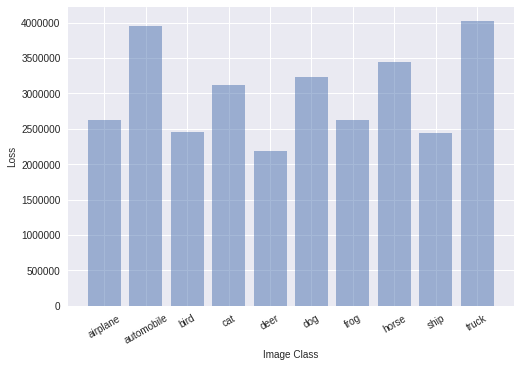

In [116]:
#loss_sum
